# FACIAL EMOTIONS CLASSIFICATION - RESNET50

#### Dominique Del Valle, Claudio Macher

### IMPORTS

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import cv2
import os

### Definir cantidad de épocas

In [2]:
epoca_uno = 20
epoca_dos = 30

### DATASET PATH

In [3]:
general_path = 'emotion_images'
train_path = 'emotion_images/train'
test_path = 'emotion_images/test'
validation_path = 'emotion_images/validation'
image_categories = os.listdir('emotion_images/train')

### PLOT CATEGORIES

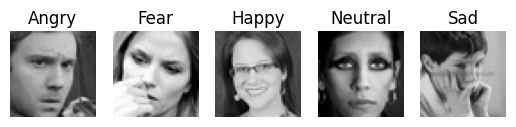

In [4]:
def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(10, 10))
    
classes = []

for i, cat in enumerate(image_categories):
    classes.append(cat)

    # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0

    # Create Subplot and plot the images
    plt.subplot(2, 5, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()

In [38]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   shear_range=0.2,
                                   rescale=1./255,
                                   zoom_range=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    seed=42,
    class_mode="categorical",
    classes=classes)


test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    seed=42,
    shuffle=False,
    batch_size=32,
    class_mode="categorical",
    classes=classes)


val_set = val_datagen.flow_from_directory(
    validation_path,
    target_size=(224, 224),
    seed=42,
    shuffle=False,
    batch_size=32,
    class_mode="categorical",
    classes=classes)


Found 19970 images belonging to 5 classes.
Found 4202 images belonging to 5 classes.
Found 4230 images belonging to 5 classes.


In [6]:
from keras.models import Model
import keras
from keras import Sequential
from keras.layers import *
from sklearn.metrics import confusion_matrix, classification_report 

In [7]:
def plotLossAccuracy(model_history):
    plt.plot(model_history.history['loss'], label='train loss')
    plt.plot(model_history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    # plt.savefig('LossVal_loss')
    plt.plot(model_history.history['accuracy'], label='train acc')
    plt.plot(model_history.history['val_accuracy'], label='val acc')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
    # plt.savefig('AccVal_acc')

In [8]:
def plotConfusionMatrix(test_labels, test_pred):
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(tf.math.confusion_matrix(
        test_labels,
        test_pred,
        num_classes=None,
        weights=None,
        dtype=tf.dtypes.int32,
        name=None,
    ), annot=True,
        fmt="d")
    ax.set_xlabel('Predicted', fontsize=14, weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylabel('Actual', fontsize=14, weight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title('Confusion Matrix - Test Set', fontsize=16, weight='bold', pad=20)

### CNN desde 0

In [9]:
from keras import Sequential
from keras import layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

#### Iteración 1

In [10]:
model = Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5,'softmax'))
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        36896     
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                    

In [11]:
cnn_history_1 = model.fit(train_set,epochs=epoca_uno,validation_data=val_set)

Epoch 1/20
625/625 [==============================] - 339s 540ms/step - loss: 1.5986 - accuracy: 0.2674 - val_loss: 1.5864 - val_accuracy: 0.2870
Epoch 2/20
625/625 [==============================] - 337s 540ms/step - loss: 1.5919 - accuracy: 0.2865 - val_loss: 1.5855 - val_accuracy: 0.2870
Epoch 3/20
625/625 [==============================] - 335s 536ms/step - loss: 1.5897 - accuracy: 0.2865 - val_loss: 1.5856 - val_accuracy: 0.2870
Epoch 4/20
625/625 [==============================] - 335s 536ms/step - loss: 1.5889 - accuracy: 0.2865 - val_loss: 1.5849 - val_accuracy: 0.2870
Epoch 5/20
625/625 [==============================] - 388s 620ms/step - loss: 1.5887 - accuracy: 0.2865 - val_loss: 1.5853 - val_accuracy: 0.2870
Epoch 6/20
625/625 [==============================] - 357s 571ms/step - loss: 1.5892 - accuracy: 0.2865 - val_loss: 1.5850 - val_accuracy: 0.2870
Epoch 7/20
625/625 [==============================] - 337s 539ms/step - loss: 1.5891 - accuracy: 0.2865 - val_loss: 1.5853 -

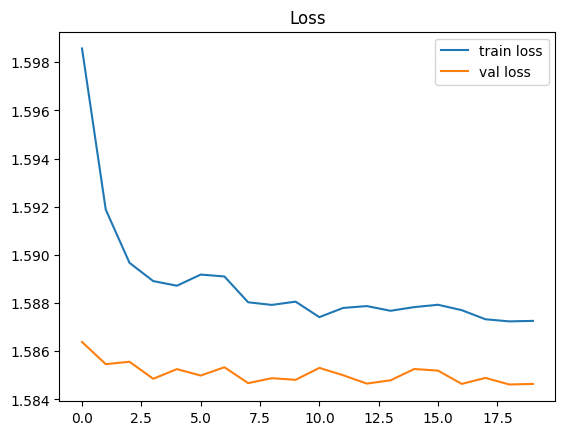

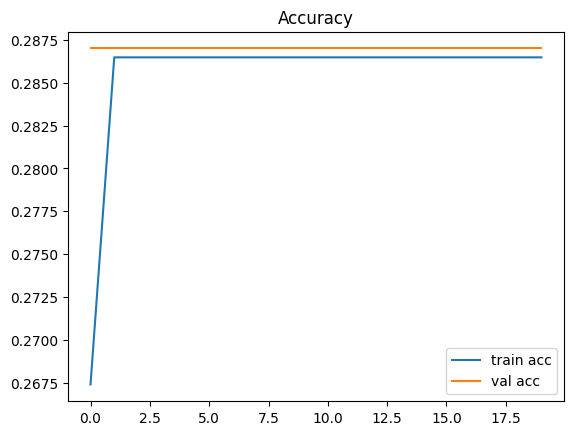

In [12]:
plotLossAccuracy(cnn_history_1)

In [13]:
cnn_auc = model.evaluate(test_set)

132/132 [==============================] - 33s 250ms/step - loss: 1.5848 - accuracy: 0.2870


In [14]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred, axis=1)
test_labels = test_set.labels

132/132 [==============================] - 19s 144ms/step


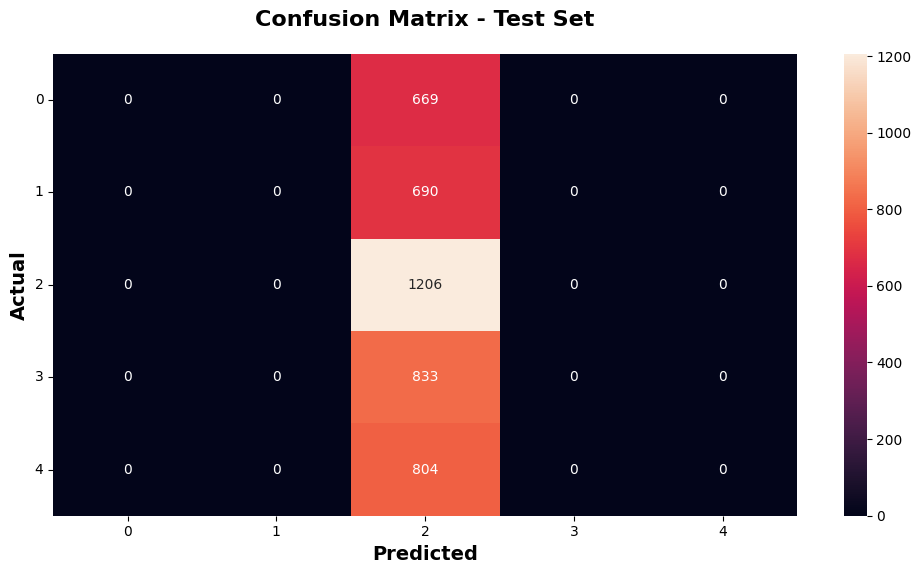

In [15]:
plotConfusionMatrix(test_labels, test_pred)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       669
           1       0.00      0.00      0.00       690
           2       0.29      1.00      0.45      1206
           3       0.00      0.00      0.00       833
           4       0.00      0.00      0.00       804

    accuracy                           0.29      4202
   macro avg       0.06      0.20      0.09      4202
weighted avg       0.08      0.29      0.13      4202



d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Iteración 2

In [17]:
#   Se invierte 34 y 64 filtros en capas convolucionales
#   Se agrega MaxPooling después de cada convolución
#   Se reduce el primer dropout a 0.3

model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5,'softmax'))
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 111, 111, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 128)       36992     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)        

In [18]:
cnn_history_2 = model.fit(train_set,epochs=epoca_dos,validation_data=val_set)

Epoch 1/30
625/625 [==============================] - 121s 193ms/step - loss: 1.5970 - accuracy: 0.2678 - val_loss: 1.5852 - val_accuracy: 0.2870
Epoch 2/30
625/625 [==============================] - 120s 192ms/step - loss: 1.5915 - accuracy: 0.2865 - val_loss: 1.5848 - val_accuracy: 0.2870
Epoch 3/30
625/625 [==============================] - 116s 186ms/step - loss: 1.5926 - accuracy: 0.2860 - val_loss: 1.5851 - val_accuracy: 0.2870
Epoch 4/30
625/625 [==============================] - 116s 185ms/step - loss: 1.5883 - accuracy: 0.2865 - val_loss: 1.5847 - val_accuracy: 0.2870
Epoch 5/30
625/625 [==============================] - 116s 185ms/step - loss: 1.5885 - accuracy: 0.2865 - val_loss: 1.5849 - val_accuracy: 0.2870
Epoch 6/30
625/625 [==============================] - 116s 185ms/step - loss: 1.5884 - accuracy: 0.2865 - val_loss: 1.5846 - val_accuracy: 0.2870
Epoch 7/30
625/625 [==============================] - 116s 185ms/step - loss: 1.5898 - accuracy: 0.2864 - val_loss: 1.5844 -

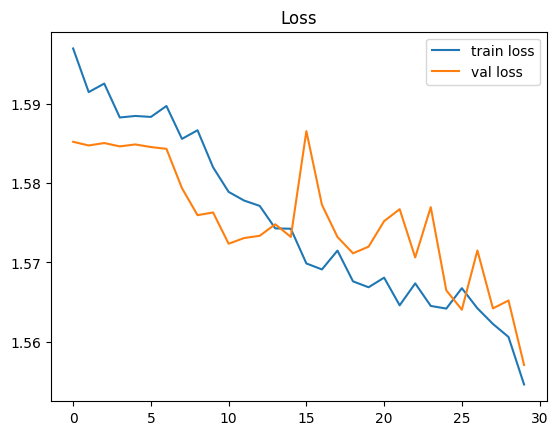

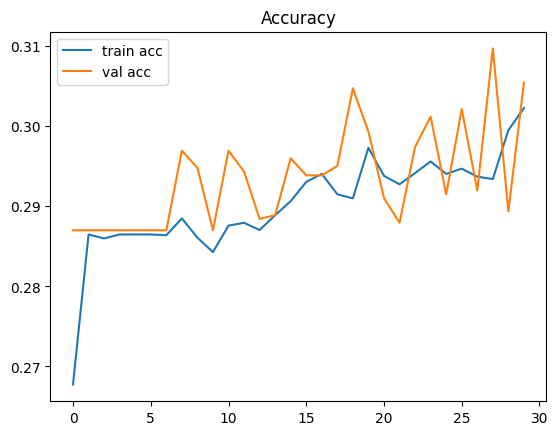

In [19]:
plotLossAccuracy(cnn_history_2)

In [20]:
cnn_auc = model.evaluate(test_set)

132/132 [==============================] - 22s 170ms/step - loss: 1.5433 - accuracy: 0.3058


In [21]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred, axis=1)
test_labels = test_set.labels

132/132 [==============================] - 6s 44ms/step


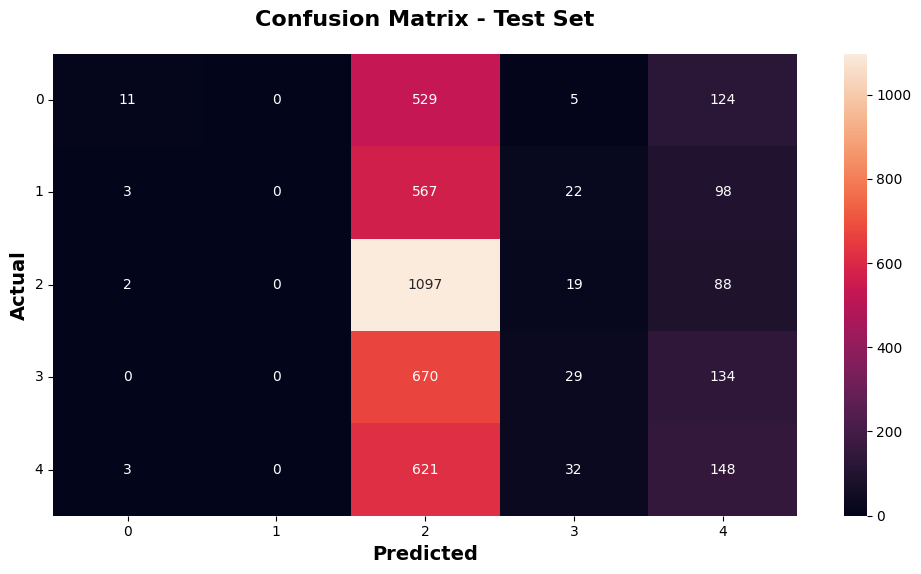

In [22]:
plotConfusionMatrix(test_labels, test_pred)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.58      0.02      0.03       669
           1       0.00      0.00      0.00       690
           2       0.31      0.91      0.47      1206
           3       0.27      0.03      0.06       833
           4       0.25      0.18      0.21       804

    accuracy                           0.31      4202
   macro avg       0.28      0.23      0.15      4202
weighted avg       0.28      0.31      0.19      4202



d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Iteración 3

In [28]:
#   Se agrega una convolución y una max pooling
#   Se agrega un dropout de 0.2
#   Se aumentan las épocas

model = Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5,'softmax'))
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 111, 111, 64)      640       
                                                                 
 conv2d_19 (Conv2D)          (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 128)      0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 27, 27, 128)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 25, 25, 32)        36896     
                                                                 
 conv2d_21 (Conv2D)          (None, 23, 23, 64)        18496     
                                                      

In [29]:
cnn_history_3 = model.fit(train_set,epochs=epoca_dos,validation_data=val_set)

Epoch 1/30
625/625 [==============================] - 346s 553ms/step - loss: 1.5994 - accuracy: 0.2701 - val_loss: 1.5872 - val_accuracy: 0.2870
Epoch 2/30
625/625 [==============================] - 353s 565ms/step - loss: 1.5912 - accuracy: 0.2865 - val_loss: 1.5866 - val_accuracy: 0.2870
Epoch 3/30
625/625 [==============================] - 343s 548ms/step - loss: 1.5905 - accuracy: 0.2865 - val_loss: 1.5865 - val_accuracy: 0.2870
Epoch 4/30
625/625 [==============================] - 344s 550ms/step - loss: 1.5901 - accuracy: 0.2865 - val_loss: 1.5859 - val_accuracy: 0.2870
Epoch 5/30
625/625 [==============================] - 344s 550ms/step - loss: 1.5893 - accuracy: 0.2865 - val_loss: 1.5851 - val_accuracy: 0.2870
Epoch 6/30
625/625 [==============================] - 343s 548ms/step - loss: 1.5883 - accuracy: 0.2865 - val_loss: 1.5847 - val_accuracy: 0.2870
Epoch 7/30
625/625 [==============================] - 342s 547ms/step - loss: 1.5881 - accuracy: 0.2865 - val_loss: 1.5849 -

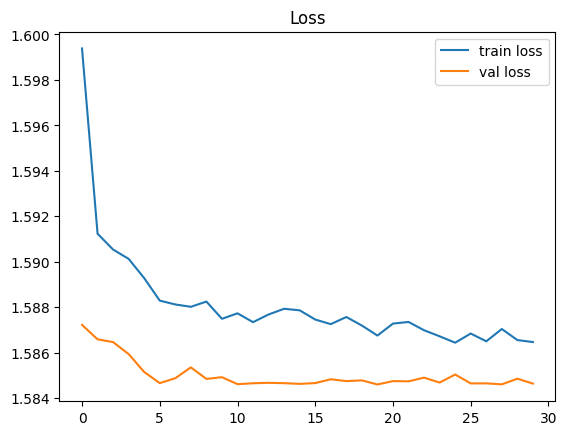

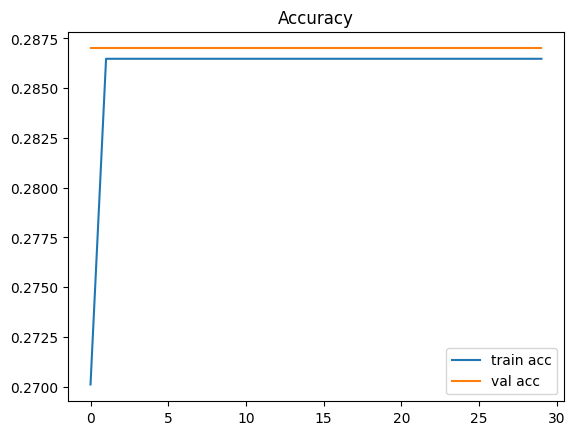

In [30]:
plotLossAccuracy(cnn_history_3)

In [31]:
cnn_auc = model.evaluate(test_set)

132/132 [==============================] - 19s 147ms/step - loss: 1.5848 - accuracy: 0.2870


In [32]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred, axis=1)
test_labels = test_set.labels

132/132 [==============================] - 19s 145ms/step


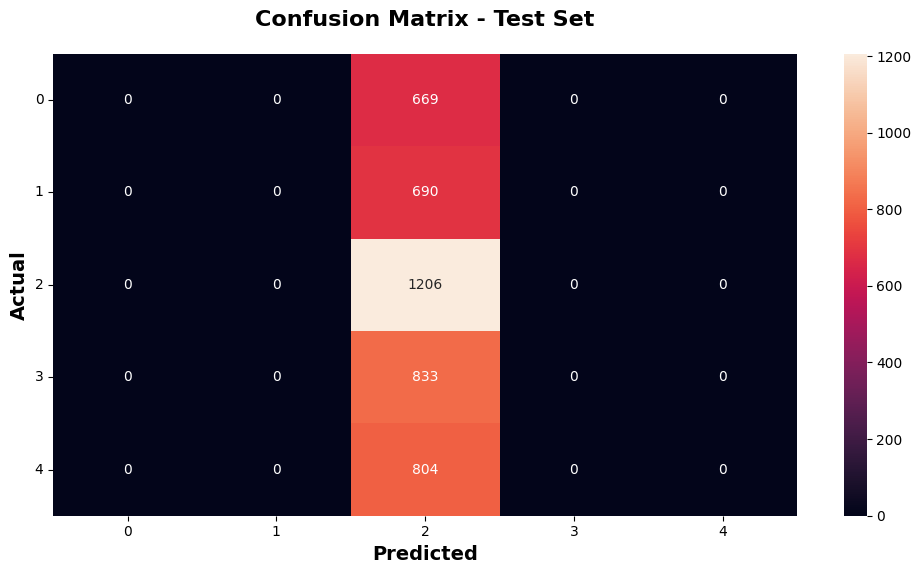

In [33]:
plotConfusionMatrix(test_labels, test_pred)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       669
           1       0.00      0.00      0.00       690
           2       0.29      1.00      0.45      1206
           3       0.00      0.00      0.00       833
           4       0.00      0.00      0.00       804

    accuracy                           0.29      4202
   macro avg       0.06      0.20      0.09      4202
weighted avg       0.08      0.29      0.13      4202



d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RESNET-50

In [39]:
from keras.applications.resnet import ResNet50
resnet = ResNet50(include_top=False,
                  weights='imagenet',
                  input_shape=(224, 224, 3))
for layer in resnet.layers:
    layer.trainable = False

model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_16 (Dense)            (None, 5)                 501765    
                                                                 
Total params: 24,089,477
Trainable params: 501,765
Non-trainable params: 23,587,712
_________________________________________________________________


#### Iteración 1

In [40]:
resnet_history_1 = model.fit(train_set,epochs=epoca_uno,validation_data=val_set)

Epoch 1/20
625/625 [==============================] - 1588s 3s/step - loss: 9.4598 - accuracy: 0.2297 - val_loss: 6.2979 - val_accuracy: 0.2076
Epoch 2/20
625/625 [==============================] - 1587s 3s/step - loss: 8.1558 - accuracy: 0.2512 - val_loss: 9.5522 - val_accuracy: 0.3324
Epoch 3/20
625/625 [==============================] - 1587s 3s/step - loss: 8.1113 - accuracy: 0.2500 - val_loss: 5.5328 - val_accuracy: 0.1638
Epoch 4/20
625/625 [==============================] - 1601s 3s/step - loss: 8.3829 - accuracy: 0.2469 - val_loss: 9.2830 - val_accuracy: 0.1976
Epoch 5/20
625/625 [==============================] - 1622s 3s/step - loss: 8.0554 - accuracy: 0.2559 - val_loss: 3.1176 - val_accuracy: 0.3303
Epoch 6/20
625/625 [==============================] - 1590s 3s/step - loss: 9.2202 - accuracy: 0.2324 - val_loss: 13.2434 - val_accuracy: 0.1991
Epoch 7/20
625/625 [==============================] - 1597s 3s/step - loss: 8.1834 - accuracy: 0.2623 - val_loss: 6.1977 - val_accuracy

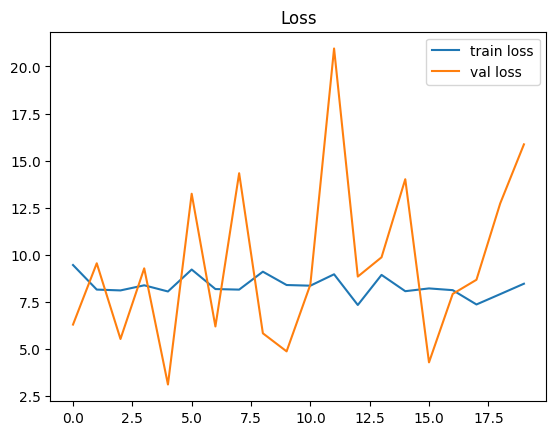

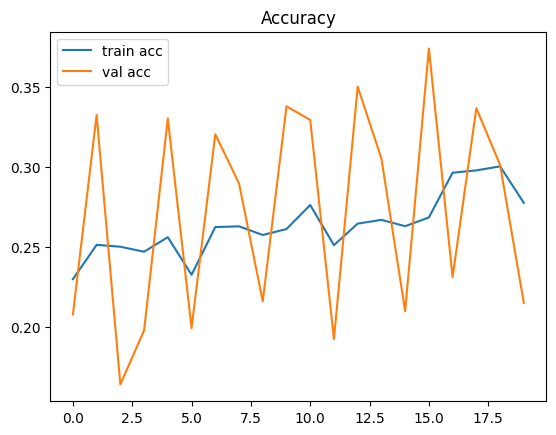

In [41]:
plotLossAccuracy(resnet_history_1)

In [42]:
resnet_auc = model.evaluate(test_set)

132/132 [==============================] - 305s 2s/step - loss: 15.6948 - accuracy: 0.2101


In [43]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

132/132 [==============================] - 305s 2s/step


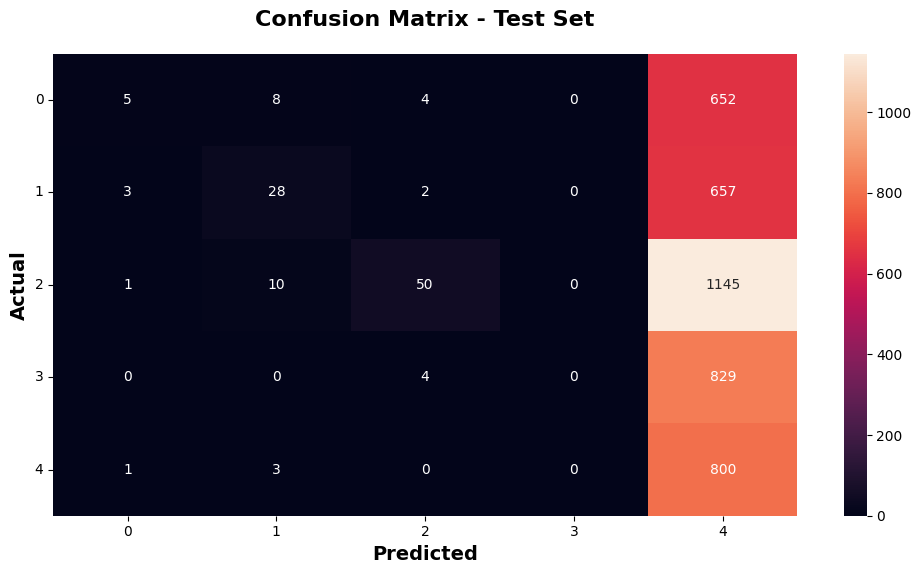

In [44]:
plotConfusionMatrix(test_labels, test_pred)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.50      0.01      0.01       669
           1       0.57      0.04      0.08       690
           2       0.83      0.04      0.08      1206
           3       0.00      0.00      0.00       833
           4       0.20      1.00      0.33       804

    accuracy                           0.21      4202
   macro avg       0.42      0.22      0.10      4202
weighted avg       0.45      0.21      0.10      4202



d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Inception

In [46]:
from keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(include_top=False,
                        weights='imagenet',
                        input_shape=(224, 224, 3))
for layer in inception.layers:
    layer.trainable = False
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_7 (Flatten)         (None, 51200)             0         
                                                                 
 dense_17 (Dense)            (None, 5)                 256005    
                                                                 
Total params: 22,058,789
Trainable params: 256,005
Non-trainable params: 21,802,784
_________________________________________________________________


#### Iteración 1

In [47]:
inception_history_1 = model.fit(train_set,epochs=epoca_uno,validation_data=val_set)

Epoch 1/20
625/625 [==============================] - 1067s 2s/step - loss: 15.3753 - accuracy: 0.3252 - val_loss: 14.1461 - val_accuracy: 0.3877
Epoch 2/20
625/625 [==============================] - 1011s 2s/step - loss: 12.4011 - accuracy: 0.3890 - val_loss: 13.6272 - val_accuracy: 0.3624
Epoch 3/20
625/625 [==============================] - 1020s 2s/step - loss: 10.1253 - accuracy: 0.4373 - val_loss: 15.0156 - val_accuracy: 0.4095
Epoch 4/20
625/625 [==============================] - 1013s 2s/step - loss: 11.0246 - accuracy: 0.4327 - val_loss: 8.9192 - val_accuracy: 0.4270
Epoch 5/20
625/625 [==============================] - 1020s 2s/step - loss: 11.2795 - accuracy: 0.4208 - val_loss: 16.1413 - val_accuracy: 0.3962
Epoch 6/20
625/625 [==============================] - 1021s 2s/step - loss: 10.8489 - accuracy: 0.4318 - val_loss: 11.2351 - val_accuracy: 0.4293
Epoch 7/20
625/625 [==============================] - 1014s 2s/step - loss: 9.8918 - accuracy: 0.4697 - val_loss: 7.2813 - va

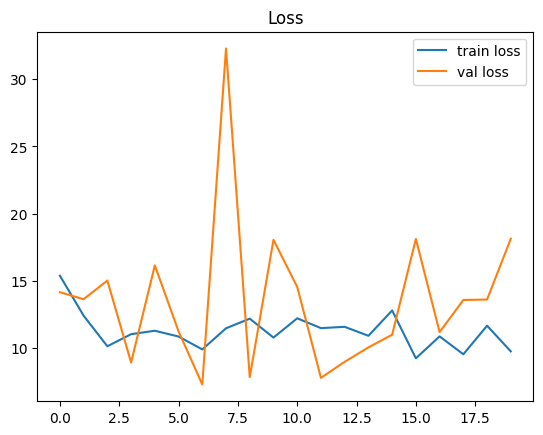

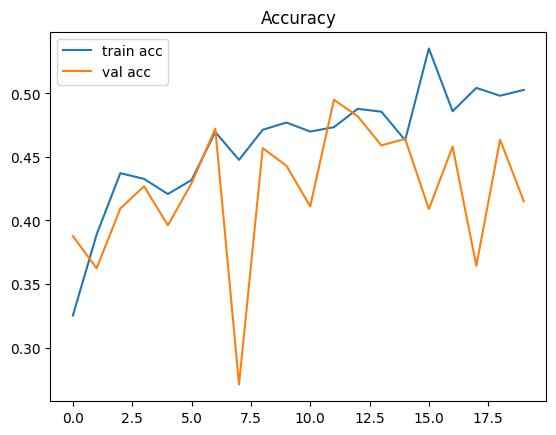

In [48]:
plotLossAccuracy(inception_history_1)

In [49]:
inception_auc = model.evaluate(test_set)

132/132 [==============================] - 173s 1s/step - loss: 15.7131 - accuracy: 0.4541


In [50]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred, axis = 1)
test_labels = test_set.labels

132/132 [==============================] - 172s 1s/step


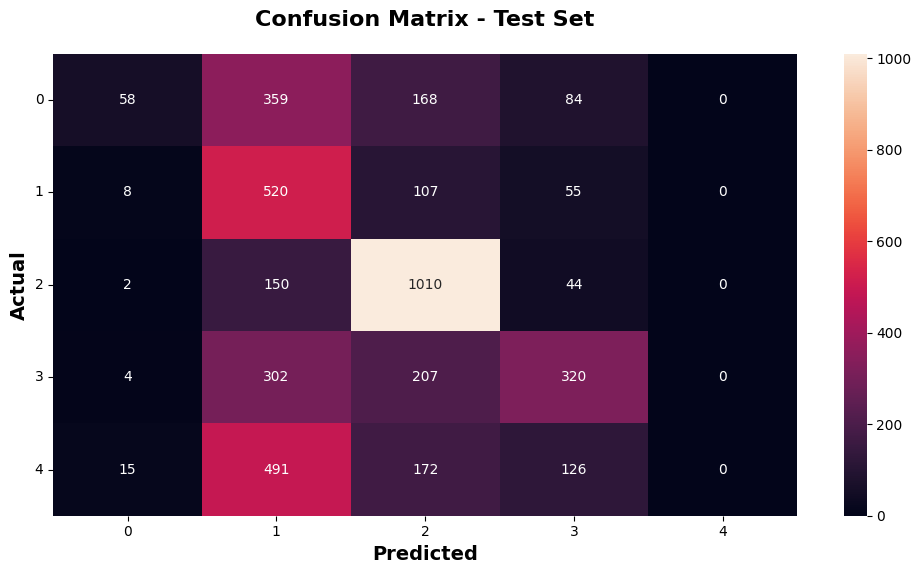

In [51]:
plotConfusionMatrix(test_labels, test_pred)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.67      0.09      0.15       669
           1       0.29      0.75      0.41       690
           2       0.61      0.84      0.70      1206
           3       0.51      0.38      0.44       833
           4       0.00      0.00      0.00       804

    accuracy                           0.45      4202
   macro avg       0.41      0.41      0.34      4202
weighted avg       0.43      0.45      0.38      4202



d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programas\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [53]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels
import glob

In [54]:
def getEmotions(emotions, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['train', 'test']
    if not k_fold:
        path = general_path + '/' + data_type + '/'
        for i,f in enumerate(emotions):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("Existen " , j , " imágenes de  " , data_type.upper(), " de " , emotions[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = general_path + '/' + data_type + v + "/"
            for i,f in enumerate(emotions):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

In [55]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels= classes, yticklabels = classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax


In [56]:
dim = 100
X_train, y_train = getEmotions(classes, 'train', print_n=True, k_fold=False)
X_test, y_test = getEmotions(classes, 'test', print_n=True, k_fold=False)

X, y = getEmotions(classes, '', print_n=True, k_fold=True)

scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

X = scaler.fit_transform([i.flatten() for i in X])

Existen  3171  imágenes de   TRAIN  de  ANGRY
Existen  3256  imágenes de   TRAIN  de  FEAR
Existen  5721  imágenes de   TRAIN  de  HAPPY
Existen  3976  imágenes de   TRAIN  de  NEUTRAL
Existen  3846  imágenes de   TRAIN  de  SAD
Existen  669  imágenes de   TEST  de  ANGRY
Existen  690  imágenes de   TEST  de  FEAR
Existen  1172  imágenes de   TEST  de  HAPPY
Existen  777  imágenes de   TEST  de  NEUTRAL
Existen  780  imágenes de   TEST  de  SAD


KeyboardInterrupt: 

In [ ]:
svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
cm, _ = plot_confusion_matrix(y_test, y_pred, classes=y_train,
                              normalize=True, title='Normalized confusion matrix')
plt.show()

: 